# Project: Investigating The TMDB Movie Dataset
# Name: Anibaba Ayodeji

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will provide a brief introduction to the dataset I've selected for analysis. At the end of this section, I wil describe the questions that I plan on exploring over the course of the report.

>**Introduction to dataset**:
>I will be using TMDB movie dataset, This data set contains information over 10,000 movies collected from The Movie Database (TMDb), including revenue, budget, movie name and many more.

In [60]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [61]:
# Loading the data
tmdb_df = pd.read_csv(r"C:\Users\Ayodeji Anibaba\Downloads\tmdb-movies.csv")
#  lets see the top 5 rows
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>**Questions that can be answered by looking at the datasets are:**

*Some general questions that can be answered are:*

* what is the profit for each movie released?
* Which movie had the highest and lowest profit?
* Which movie had the greatest and least runtime?
* What is the average runtime of all movies?
* Which movie had the highest and lowest budget?
* Which movie had the highest and lowest revenue?


>**Some questions that can be answered based on the Profit of movies making more then 200M Dollars:**
1. What is the average budget for these movie?
2. What is the average revenue for these movie?
3. What is the average runtime for these movie?
4. Which are the successfull genres in these profit margin?
5. Which are the most frequent cast involved in these profit margin?

<a id='wrangling'></a>
## Data Wrangling

> **Lets load the dataset then investigate to see what cleaning and wrangling of data is needed in this dataset **
1. assuming all our money related columns are in dollars

In [62]:
# Loading the data
tmdb_df = pd.read_csv(r"C:\Users\Ayodeji Anibaba\Downloads\tmdb-movies.csv")
#  lets see the top 5 rows
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [63]:
# lets see our summary statistics
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [64]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [65]:
# lets see how many duplicated rows that we have
sum(tmdb_df.duplicated())

1

### Cleaning that needs to be performed by looking at the above dataset:

Firstly, i will remove columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count' and 'vote_average' because they wont be relevant to my analysis questions to be answered.

Secondly, i will delete the one duplicated row that we have in our dataset.

Thirdly, there are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded. So we need to discard these rows, since we cannot calculate profit of such movies.

Futhermore, The 'release_date' column must be converted into datetime format because it currently appears as a string, Convert budget and revenue column to int datatype.

Finally, Replace runtime value of 0 to nan, Since it will affect the result.

### Data Cleaning (Let us do the above cleaning stated above!)

In [66]:
#uneeded columns in a list
unneeded_columns=['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average']
#dropping the unneeded columns
tmdb_df.drop(unneeded_columns, axis=1, inplace=True)
#viewing the new dataset
tmdb_df.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


In [67]:
#lets see shape of our new dataset 
(row, col) =tmdb_df.shape
print('we have {} rows and {} columns in this dataset'.format(row, col))

we have 10866 rows and 8 columns in this dataset


In [68]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   cast            10790 non-null  object
 4   runtime         10866 non-null  int64 
 5   genres          10843 non-null  object
 6   release_date    10866 non-null  object
 7   release_year    10866 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 679.2+ KB


In [69]:
#lets drop the one duplicate data we have
tmdb_df.drop_duplicates(keep ='first', inplace=True)
#new shape viewing 
(row, col) =tmdb_df.shape
print('we have {} rows and {} columns in this dataset'.format(row, col))

we have 10865 rows and 8 columns in this dataset


In [70]:
tmdb_df.describe()

,budget,revenue,runtime,release_year
count,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,1.462429e+07,3.982690e+07,102.071790,2001.321859
std,3.091428e+07,1.170083e+08,31.382701,12.813260
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [71]:
#most(50%) of the data in budget and revenue column is saying 0 which means the value for these movies havent been recorded and are not worth keeping for analysis
columns =['budget', 'revenue']
#replace the zeros(0) with Nan so we can drop them
tmdb_df[columns] = tmdb_df[columns].replace(0, np.nan)
#drop nan rows
tmdb_df.dropna(subset =columns, inplace=True)
(row, col) =tmdb_df.shape
print('we have {} rows and {} columns in this dataset'.format(row-1, col))

we have 3853 rows and 8 columns in this dataset


In [72]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3854 non-null   float64
 1   revenue         3854 non-null   float64
 2   original_title  3854 non-null   object 
 3   cast            3850 non-null   object 
 4   runtime         3854 non-null   int64  
 5   genres          3854 non-null   object 
 6   release_date    3854 non-null   object 
 7   release_year    3854 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 271.0+ KB


In [73]:
tmdb_df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [74]:
# from the infographics we see that release_date is appearing as a string, we need to convert it to datetime format

tmdb_df.release_date= pd.to_datetime(tmdb_df['release_date'])

In [75]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3854 non-null   float64       
 1   revenue         3854 non-null   float64       
 2   original_title  3854 non-null   object        
 3   cast            3850 non-null   object        
 4   runtime         3854 non-null   int64         
 5   genres          3854 non-null   object        
 6   release_date    3854 non-null   datetime64[ns]
 7   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 271.0+ KB


In [76]:
tmdb_df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [77]:
tmdb_df.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


In [78]:
# columns to convert to integer 
column = ['budget', 'revenue']
# Convert budget and revenue column to int datatype
tmdb_df[column] = tmdb_df[column].astype(np.int64)
# Lets look at the new datatypes to confirm our formatting
tmdb_df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

>  We will now compute statistics and create visualizations to answer the questions we stated in the Introduction section.

### Research Question 1 (Profit for each movie and Which movie Profited the most and which Earned less?)

In [79]:
# first we have to generate our profit column
#profit = revnue-cost(budget)
tmdb_df['profit'] = tmdb_df['revenue'] -tmdb_df['budget']
tmdb_df.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [80]:
max_profit = tmdb_df['profit'].max()

min_profit = tmdb_df['profit'].min()
max_profit,min_profit

(2544505847, -413912431)

In [81]:
#Movie with the highest profit

tmdb_df.loc[tmdb_df['profit'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

> **Avatar** is the movie with the highest profit

In [82]:
# movie with the least profit

tmdb_df.loc[tmdb_df['profit'].idxmin()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

> **The Warrior's way** is the movie with the Least profit

C:\Users\Ayodeji Anibaba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


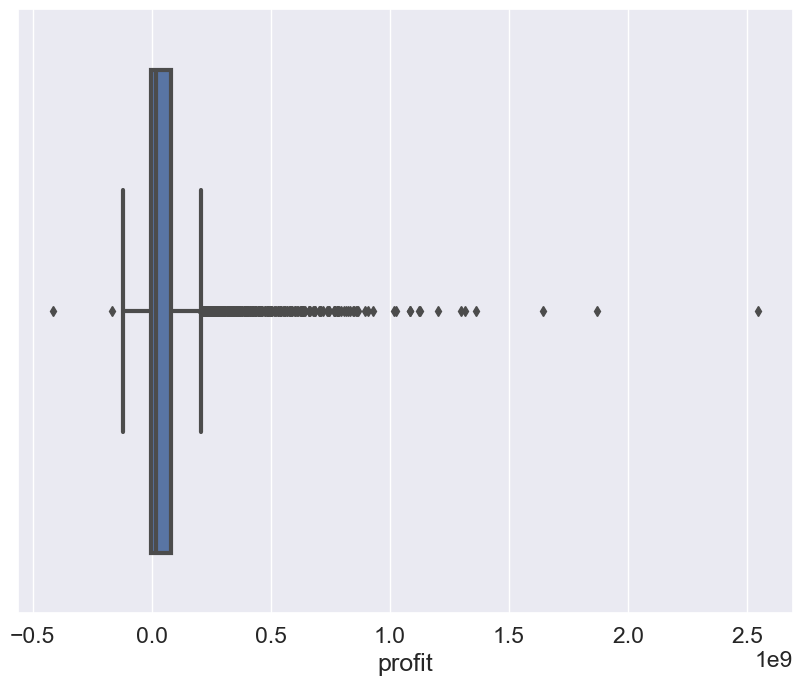

In [83]:
#lets use the box plot to view the distribution of this specific data here
plt.figure(figsize=(10,8), dpi = 100)

#using seaborn to generate the boxplot
sns.boxplot(tmdb_df['profit'], linewidth = 3)

#to view
plt.show()

C:\Users\Ayodeji Anibaba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


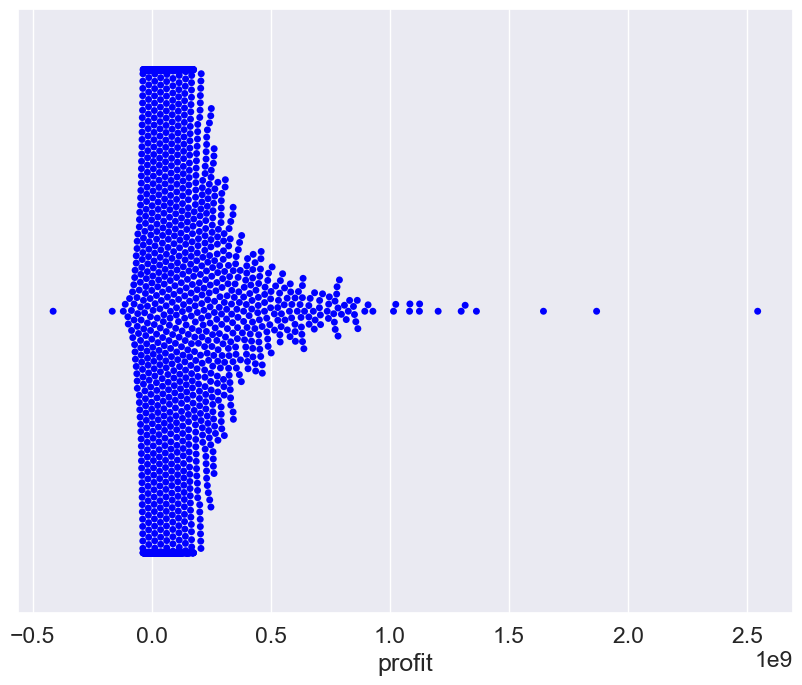

In [84]:
# we can also use the swarmplot to view the distribution even by density
plt.figure(figsize=(10,8), dpi = 100)

#using seaborn to generate the plot
sns.swarmplot(x=tmdb_df['profit'], color = 'blue')

#to view
plt.show()

> The plot generated above gives a visual of the distribution of runtime for movies by plotting the points againts their respective position on the charts by axis in the ditribution

> lets take a look at our first plot which is the box-plot, It gives us an overall idea of how spread the ditribution is in case of profit made from the movies. we also get to see the outliers here if you carefully observe the plot.


> By looking at both the plot and calculations, we can deduce that;

>* 25% of movies have a profit of less than 1 million dollars

>* 50% of movies have a profit of less than 10 million dollars. (which is the median)

>* 75% of movies have a profit of less than 20 million dollars

> we can also see from the density that most of our runtime ranges from around -1 million dollars to 40million dollars from our swarmplot

### Research Question 2  (which movie had the longest runtime and which is shortest runtime also?)

In [85]:
#Movie with the highest runtime

tmdb_df.loc[tmdb_df['runtime'].idxmax()]


budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
profit                                                    -17128721
Name: 2107, dtype: object

> **Carlos** is the movie with the highest runtime of **338mins**

In [86]:
#movie with the least runtime

tmdb_df.loc[tmdb_df['runtime'].idxmin()]

budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
profit                                                           -5
Name: 5162, dtype: object

> **Kid's Story** is the movie with the Least runtime of **15mins**

### Research Question 3: what is the average runtime for all movies?

In [87]:
#average runtime for all our movies
tmdb_df['runtime'].mean()

109.22029060716139

> The average runtime for all our movies is 109mins
 
  lets visualize this to see more

(array([2.000e+00, 1.000e+00, 2.000e+00, 3.700e+01, 9.230e+02, 1.436e+03,
        9.010e+02, 3.630e+02, 1.050e+02, 4.400e+01, 2.400e+01, 1.000e+01,
        4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 15.  ,  31.15,  47.3 ,  63.45,  79.6 ,  95.75, 111.9 , 128.05,
        144.2 , 160.35, 176.5 , 192.65, 208.8 , 224.95, 241.1 , 257.25,
        273.4 , 289.55, 305.7 , 321.85, 338.  ]),
 <BarContainer object of 20 artists>)

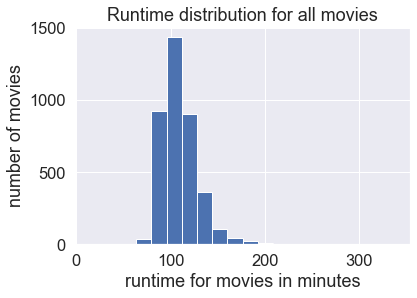

In [88]:
#label for x-axis
plt.xlabel('runtime for movies in minutes')
#label for y-axis
plt.ylabel('number of movies')
# title of the visualization
plt.title('Runtime distribution for all movies')
#plot a histogram to see the distribution
plt.hist(tmdb_df['runtime'], bins=20)

> we can see from this histogram that most of movies runtime ranges between 100-120mins

>lets see a relationship between our runtime and profit

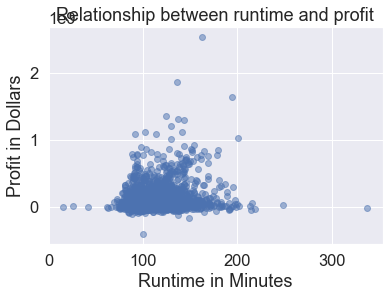

In [89]:
# label for x-axis
plt.xlabel('Runtime in Minutes')
# label for y-axis
plt.ylabel('Profit in Dollars')
# Title of the visualization
plt.title('Relationship between runtime and profit')
plt.scatter(tmdb_df['runtime'], tmdb_df['profit'], alpha=0.5)
plt.show()

C:\Users\Ayodeji Anibaba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


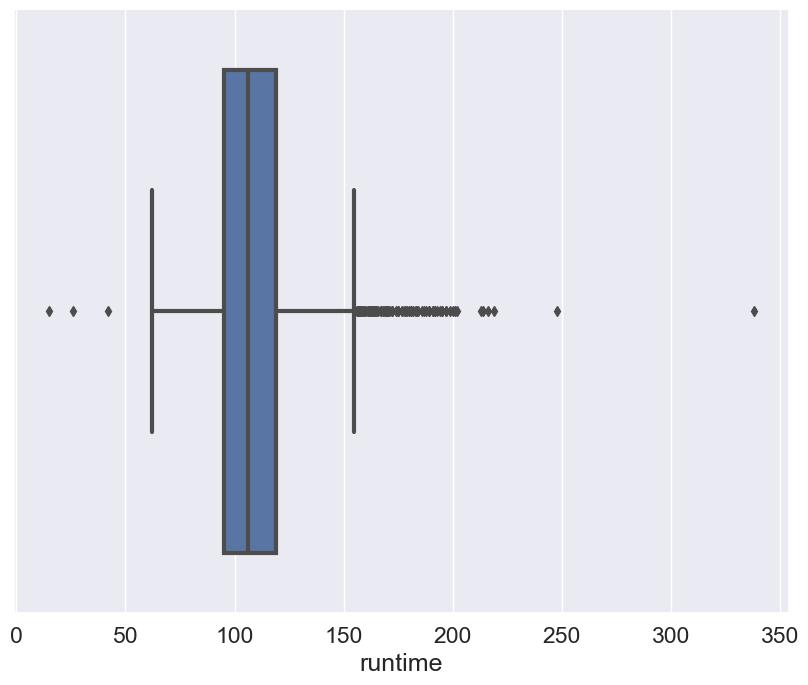

In [90]:
#lets use the box plot to view the distribution of this specific data here
plt.figure(figsize=(10,8), dpi = 100)

#using seaborn to generate the boxplot
sns.boxplot(tmdb_df['runtime'], linewidth = 3)

#to view
plt.show()

C:\Users\Ayodeji Anibaba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


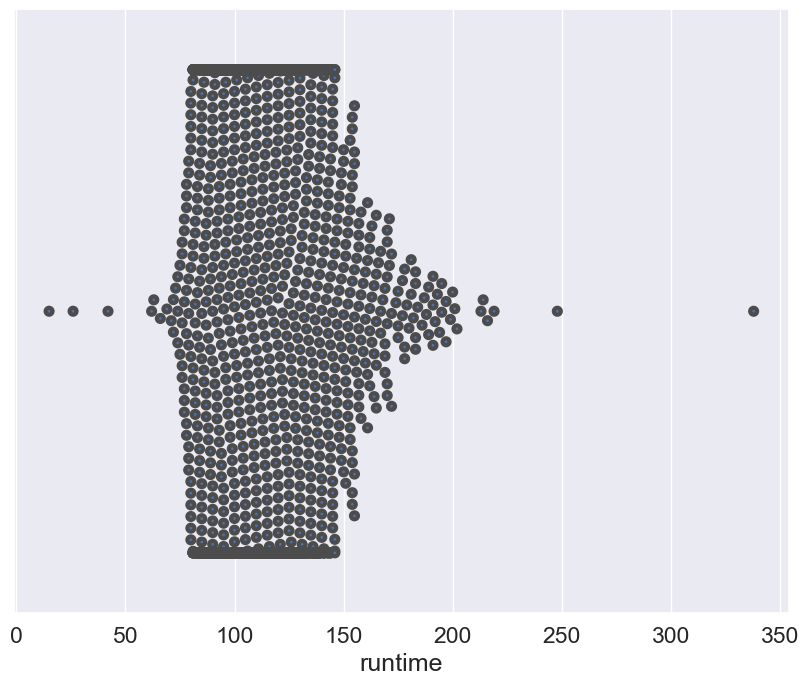

In [91]:
# we can also use the swarmplot to view the distribution even by density
plt.figure(figsize=(10,8), dpi = 100)

#using seaborn to generate the boxplot
sns.swarmplot(x=tmdb_df['runtime'], linewidth = 3)

#to view
plt.show()

> this is a positive relationship from the scatter plot.

> The plot generated above gives a visual of the distribution of runtime for movies by plotting the points againts their respective position on the charts by axis in the ditribution

>lets take a look at our first plot which is the box-plot, It gives us an overall idea of how spreaded the ditribution is in case of runtime of the movies. we also get the outliers here if you carefully observe the plot.

>By looking at both the plot and calculations, we can deduce that;

>* 25% of movies have a runtime of less than 95 minutes

>* 50% of movies have a runtime of less than 110 minutes. (which is the median)

>* 75% of movies have a runtime of less than 120 minutes

> we can also see from the density that most of our runtime ranges from around 85mins to 150mins from our swarmplot

### Research Question 4: which movie had the highest and lowest budget?

In [92]:
tmdb_df.loc[tmdb_df['budget'].idxmax()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

> **The Warriors Way** has the highest budget allocated to it.

In [93]:

tmdb_df.loc[tmdb_df['budget'].idxmin()]

budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
release_year                                                   1999
profit                                                           99
Name: 2618, dtype: object

> **Lost & Found** has the least budget allocated to it.

> lets view the relationship between budget and profit

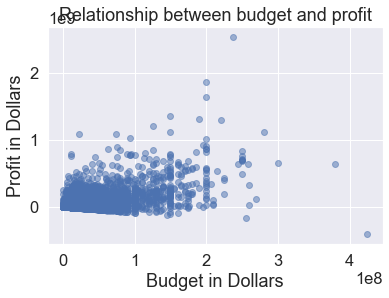

In [94]:
# label for x-axis
plt.xlabel('Budget in Dollars')
# label for y-axis
plt.ylabel('Profit in Dollars')
# Title of the visualization
plt.title('Relationship between budget and profit')
plt.scatter(tmdb_df['budget'], tmdb_df['profit'], alpha=0.5)
plt.show()

> We can see that there is no strong relationship between budget and profits, But we can see that there are very less films which didnt make profit when the budget was greater then 200M Dollars.

### Research Question 5: which movie had the highest and lowest Profit?

In [95]:
tmdb_df.loc[tmdb_df['revenue'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

> **Avatar** has the highest revenue allocated to it of over **2Bdollars**

In [96]:
tmdb_df.loc[tmdb_df['revenue'].idxmin()]

budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
release_year                                                   2003
profit                                                     -5999998
Name: 5067, dtype: object

> **Shattered Glass** has the least revenue allocated to it of just **2dollars**

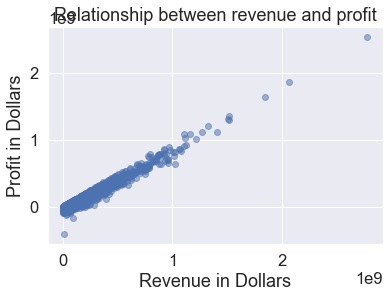

In [97]:
# label for x-axis
plt.xlabel('Revenue in Dollars')
# label for y-axis
plt.ylabel('Profit in Dollars')
# Title of the visualization
plt.title('Relationship between revenue and profit')
plt.scatter(tmdb_df['revenue'], tmdb_df['profit'], alpha=0.5)
plt.show()

> this is a very strong  positive relationship between revenue and profit

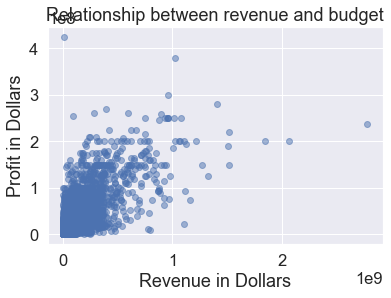

In [98]:
# label for x-axis
plt.xlabel('Revenue in Dollars')
# label for y-axis
plt.ylabel('Profit in Dollars')
# Title of the visualization
plt.title('Relationship between revenue and budget')
plt.scatter(tmdb_df['revenue'], tmdb_df['budget'], alpha=0.5)
plt.show()

> there is a  slight positive relationship here

C:\Users\Ayodeji Anibaba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


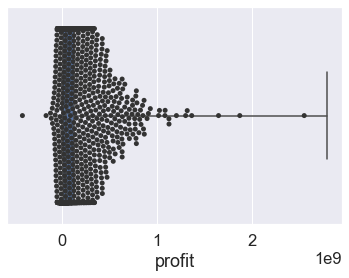

In [99]:
ax = sns.boxplot(x="revenue" ,data=tmdb_df, whis=np.inf)
ax = sns.swarmplot(x="profit" ,data=tmdb_df, color=".2")

from this comparison our maximum revenue is greater than maximum profit

                budget   revenue   runtime  release_year    profit
budget        1.000000  0.688556  0.260977      0.268040  0.526818
revenue       0.688556  1.000000  0.250298      0.139140  0.979133
runtime       0.260977  0.250298  1.000000     -0.112453  0.220238
release_year  0.268040  0.139140 -0.112453      1.000000  0.087971
profit        0.526818  0.979133  0.220238      0.087971  1.000000


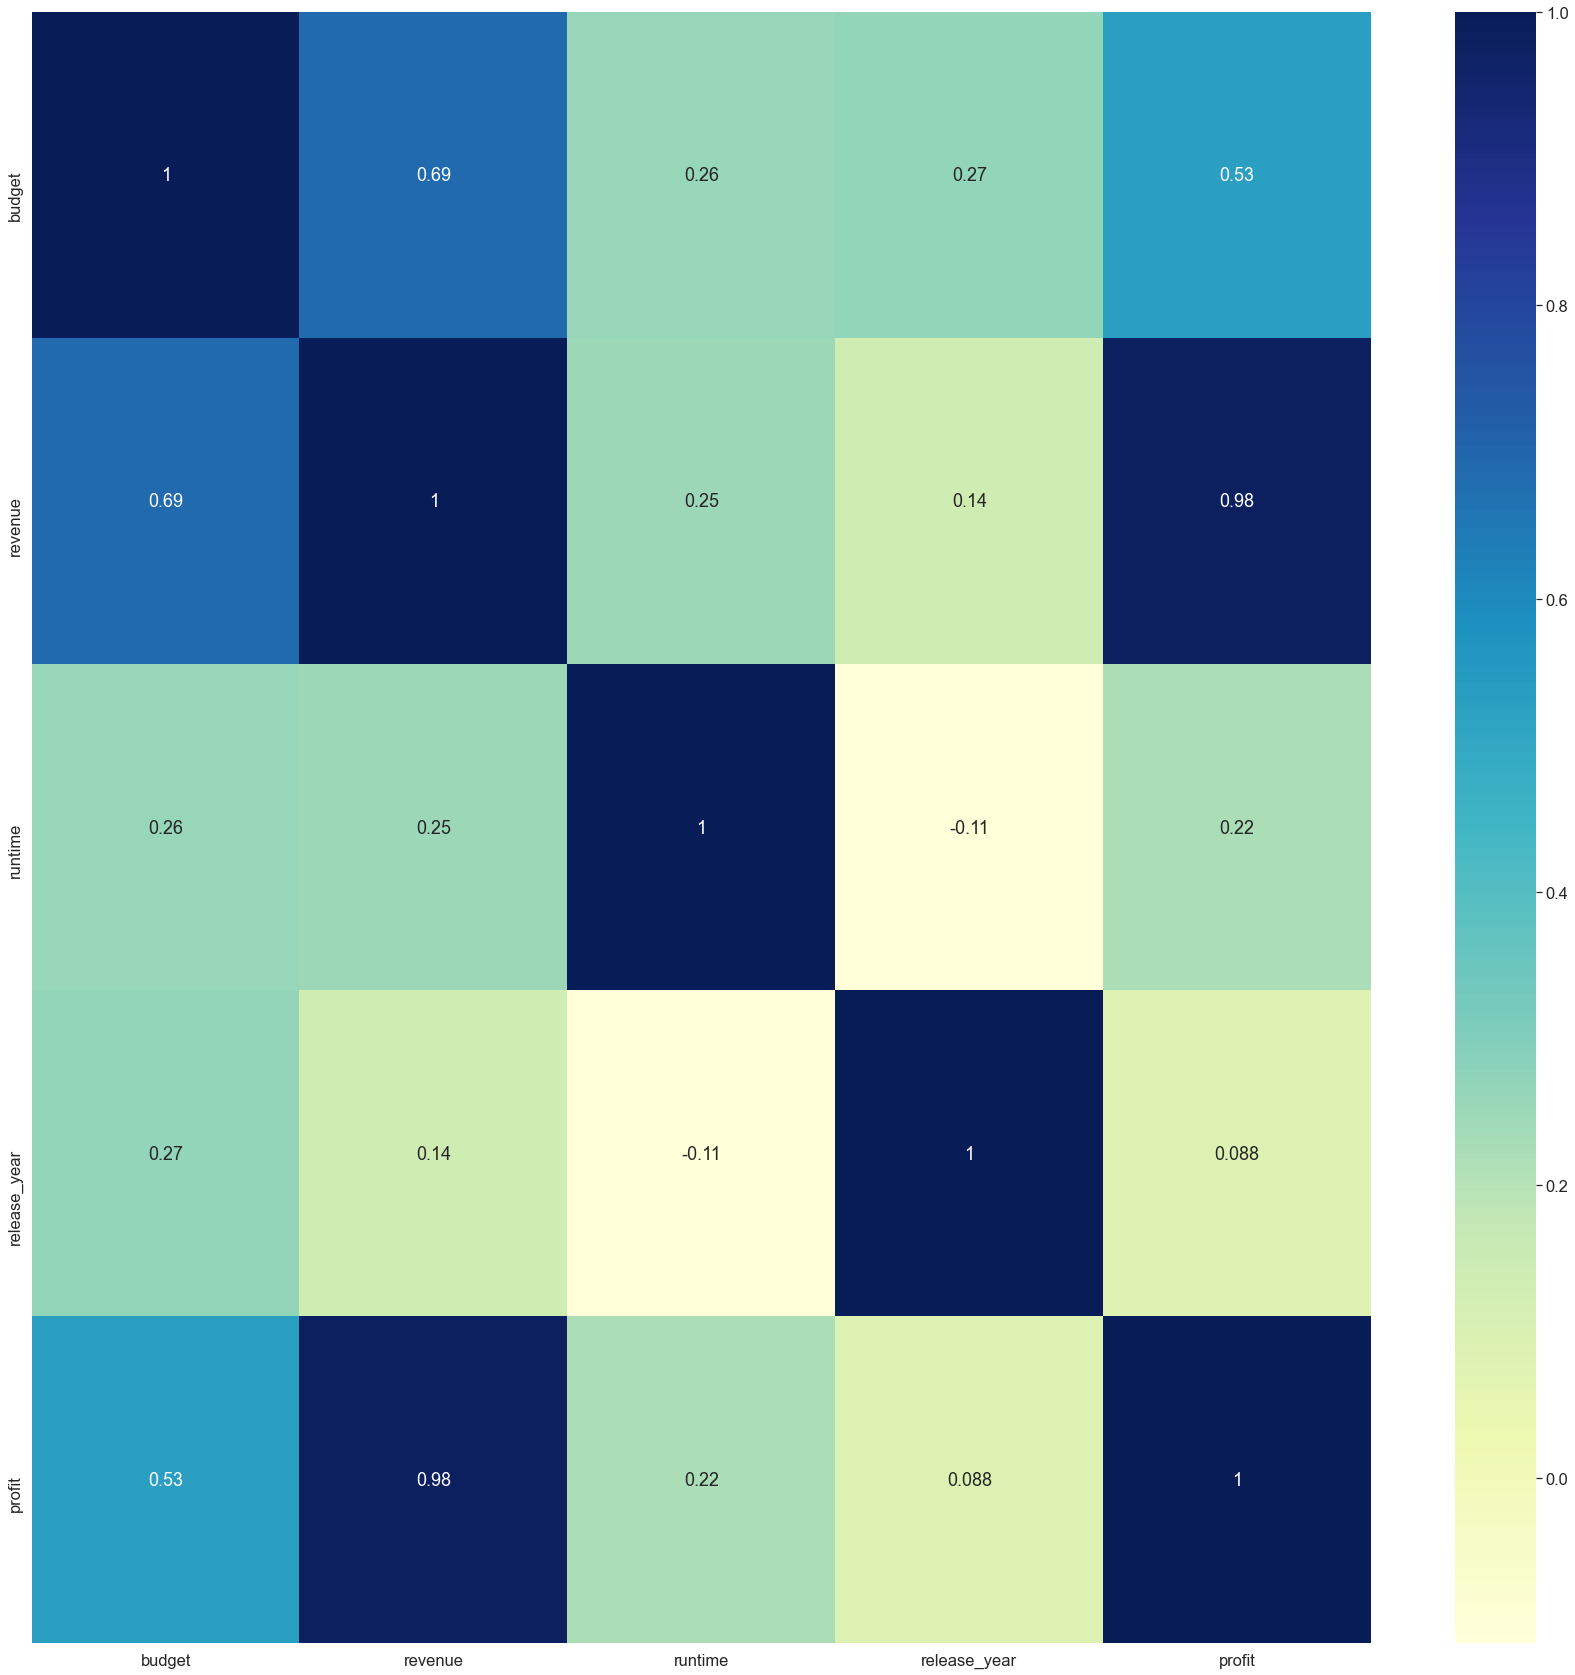

In [123]:
print(tmdb_df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(tmdb_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

> **A correlation heatmap that shows the various relationship within our data from strong to weak**

### A New DataFrame for movies with a profit of over 100million and 200million Dollars

In [100]:
# New dataframe showing movies with profit of over $100m
tmdb_abv_100m = tmdb_df[tmdb_df['profit']>= 100000000]
tmdb_abv_100m.index = range(len(tmdb_abv_100m))
tmdb_abv_100m.info()
tmdb_abv_100m

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          826 non-null    int64         
 1   revenue         826 non-null    int64         
 2   original_title  826 non-null    object        
 3   cast            826 non-null    object        
 4   runtime         826 non-null    int64         
 5   genres          826 non-null    object        
 6   release_date    826 non-null    datetime64[ns]
 7   release_year    826 non-null    int64         
 8   profit          826 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 58.2+ KB


,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360
...,...,...,...,...,...,...,...,...,...
821,8200000,163214286,The Sound of Music,Julie Andrews|Christopher Plummer|Eleanor Park...,174,Drama|Family|Music|Romance,2065-03-02,1965,155014286
822,6000000,181813770,Grease,John Travolta|Olivia Newton-John|Stockard Chan...,110,Music,1978-07-07,1978,175813770
823,20000000,187884007,Jaws 2,Roy Scheider|Lorraine Gary|Murray Hamilton|Jos...,116,Horror|Thriller,1978-06-16,1978,167884007
824,55000000,300218018,Superman,Marlon Brando|Gene Hackman|Christopher Reeve|N...,143,Adventure|Fantasy|Action|Science Fiction,1978-12-14,1978,245218018


This is a new table showing only movies with profit above 100million dollars


In [101]:
# New dataframe showing movies with profit of over $200m
tmdb_abv_200m = tmdb_df.query("profit >= 200000000 ")
tmdb_abv_200m.index = range(len(tmdb_abv_200m))
tmdb_abv_200m.info()
tmdb_abv_200m

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          396 non-null    int64         
 1   revenue         396 non-null    int64         
 2   original_title  396 non-null    object        
 3   cast            396 non-null    object        
 4   runtime         396 non-null    int64         
 5   genres          396 non-null    object        
 6   release_date    396 non-null    datetime64[ns]
 7   release_year    396 non-null    int64         
 8   profit          396 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 28.0+ KB


,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
3,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360
4,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,Western|Drama|Adventure|Thriller,2015-12-25,2015,397950503
...,...,...,...,...,...,...,...,...,...
391,4000000,205843612,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,78,Family|Animation|Adventure,2067-10-18,1967,201843612
392,15000000,356830601,Top Gun,Tom Cruise|Kelly McGillis|Val Kilmer|Anthony E...,110,Drama|Action|Romance,1986-05-16,1986,341830601
393,5000000,328203506,Crocodile Dundee,Paul Hogan|Linda Kozlowski|Mark Blum|David Gul...,97,Adventure|Comedy,1986-09-26,1986,323203506
394,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,122,Drama|Horror|Thriller,1973-12-26,1973,433306145


This is a new table showing only movies with profit above 200million dollars

### 2nd Research Question 1: What is the average budget of movies with profit over 200million dollars?

In [102]:
tmdb_abv_200m['budget'].mean()


95274684.34343435

>The average budget for movies in this range is **$95.3m**

### 2nd Research Question 2: What is the average Revenue of movies with profit over 200million dollars?

In [103]:
tmdb_abv_200m['revenue'].mean()

509325092.8560606

>The average Revenue for movies in this range is **$509.3m**

### 2nd Research Question 3: What is the averageRuntime of movies with profit over 200million dollars?

In [104]:
tmdb_abv_200m['runtime'].mean()

119.52525252525253

The average Runtime for movies in this range is **119minutes(2Hrs)**

### 2nd Research Question 4:The Successful genre of movies with profit over 200million dollars?

In [105]:
genre_count= pd.Series(tmdb_abv_200m['genres'].str.cat(sep='|').split(sep='|')).value_counts( ascending=False)
genre_count

Adventure          182
Action             173
Comedy             128
Drama              109
Thriller           103
Family             102
Fantasy             93
Science Fiction     88
Animation           68
Romance             53
Crime               44
Mystery             26
Horror              14
War                 14
Music               12
History              7
Western              4
dtype: int64

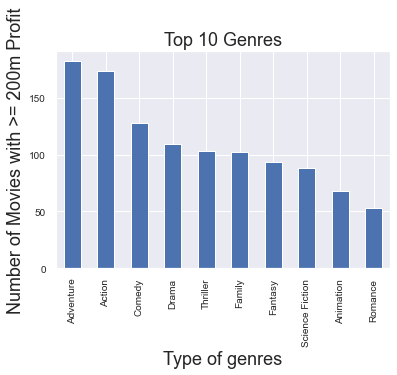

In [106]:
viz = genre_count.head(10).plot.bar(fontsize = 10)
# Set a title
viz.set(title = 'Top 10 Genres')
# x-label and y-label
viz.set_xlabel('Type of genres')
viz.set_ylabel('Number of Movies with >= 200m Profit')
# Show the plot
plt.show()


From the barplot we can see the top 10 Genre of movies that had a profit of over 200million dollars

### 2nd Research Question 5:The Most Frequent Casts in the movies with profit over 200million dollars?

In [107]:
# to get the names of cast we have to do a split of the concatenated names
cast_count= pd.Series(tmdb_abv_200m['cast'].str.cat(sep='|').split(sep='|')).value_counts( ascending=False)
cast_count.head(10)

Tom Cruise           13
Tom Hanks            12
Will Smith           10
Harrison Ford        10
Bruce Willis         10
Ben Stiller          10
Samuel L. Jackson     9
Robin Williams        9
Emma Watson           9
Brad Pitt             8
dtype: int64

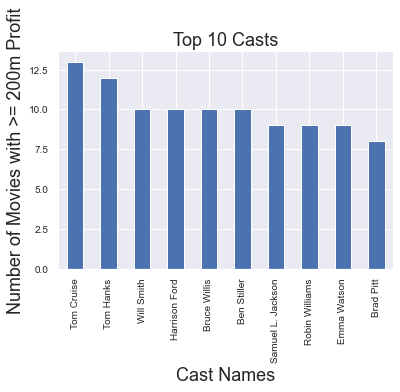

In [108]:
viz = cast_count.head(10).plot.bar(fontsize = 10)
# Set a title
viz.set(title = 'Top 10 Casts')
# x-label and y-label
viz.set_xlabel('Cast Names')
viz.set_ylabel('Number of Movies with >= 200m Profit')
# Show the plot
plt.show()

From the barplot we can see the top 10 Cast in movies that had a profit of over 200million dollars

### **A function to plot bar charts**

In [109]:
sns.set_theme(style='whitegrid')
sns.set(rc={"figure.figsize": (30, 30)}, font_scale =1.5 )

In [110]:
def plot_bar_chart(df, x, y, xlabel="", ylabel="", title="", rotation=75, show_value=True, color="salmon"):
  ax = sns.barplot(x=x, y=y, color=color, data=df)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  locs, labels = plt.xticks()
  plt.setp(labels, rotation=rotation)

  

  plt.show()

**profit by release year for the main cleaned dataset**

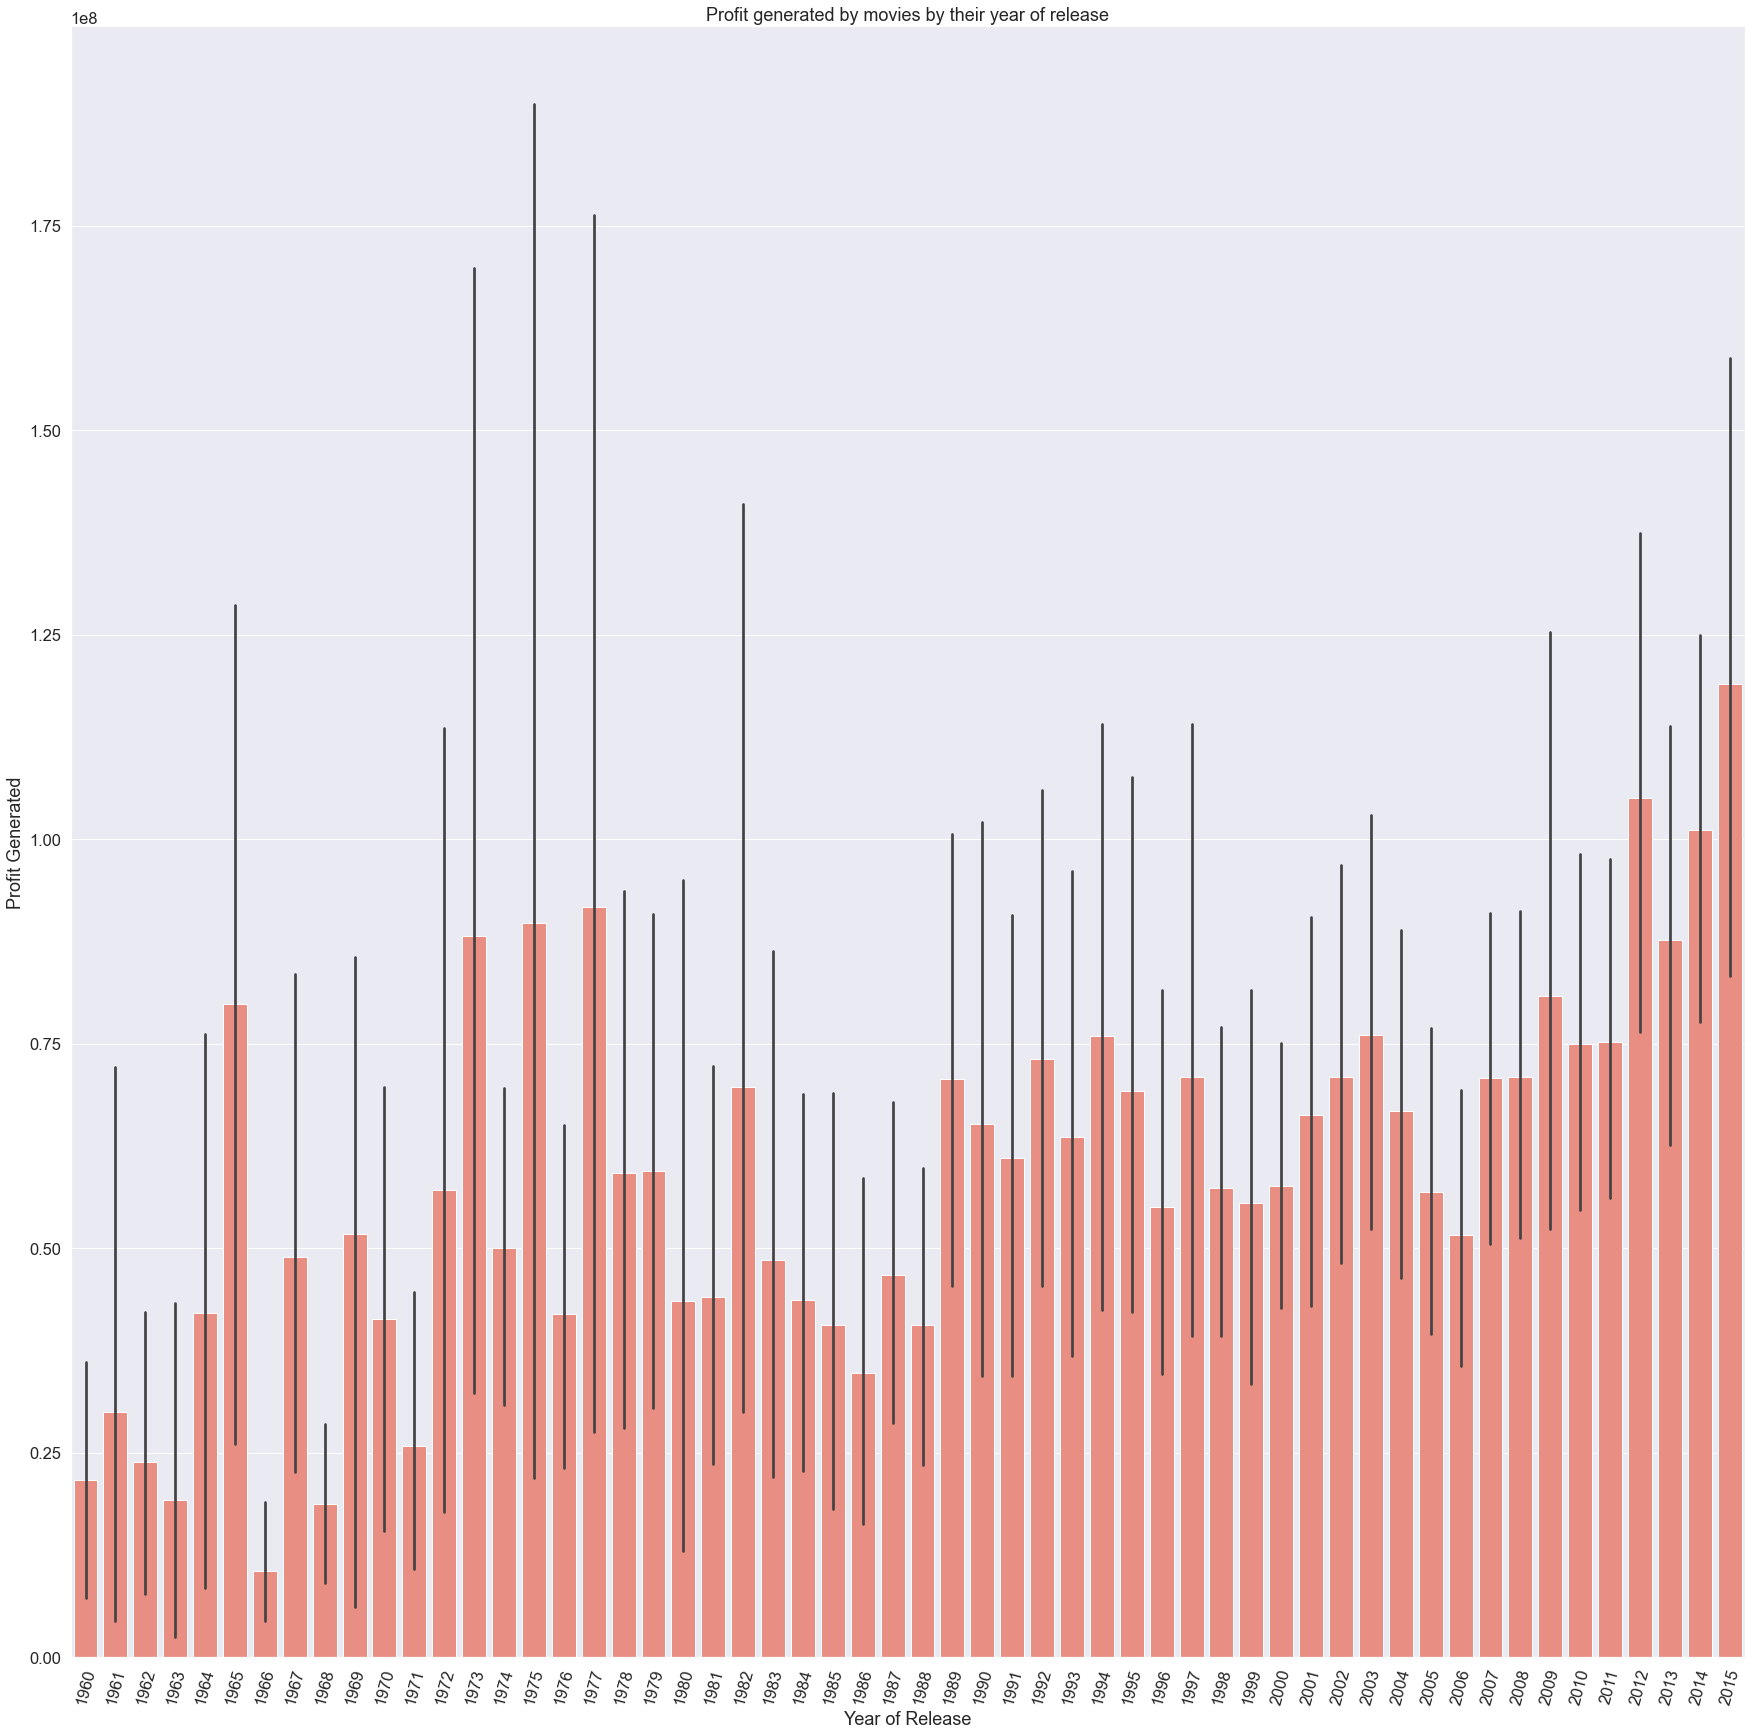

In [111]:
plot_bar_chart(tmdb_df, 'release_year', 'profit', xlabel="Year of Release", ylabel="Profit Generated", title="Profit generated by movies by their year of release", rotation=75, show_value=True, color="salmon")

> **For movies with profit above 200m**

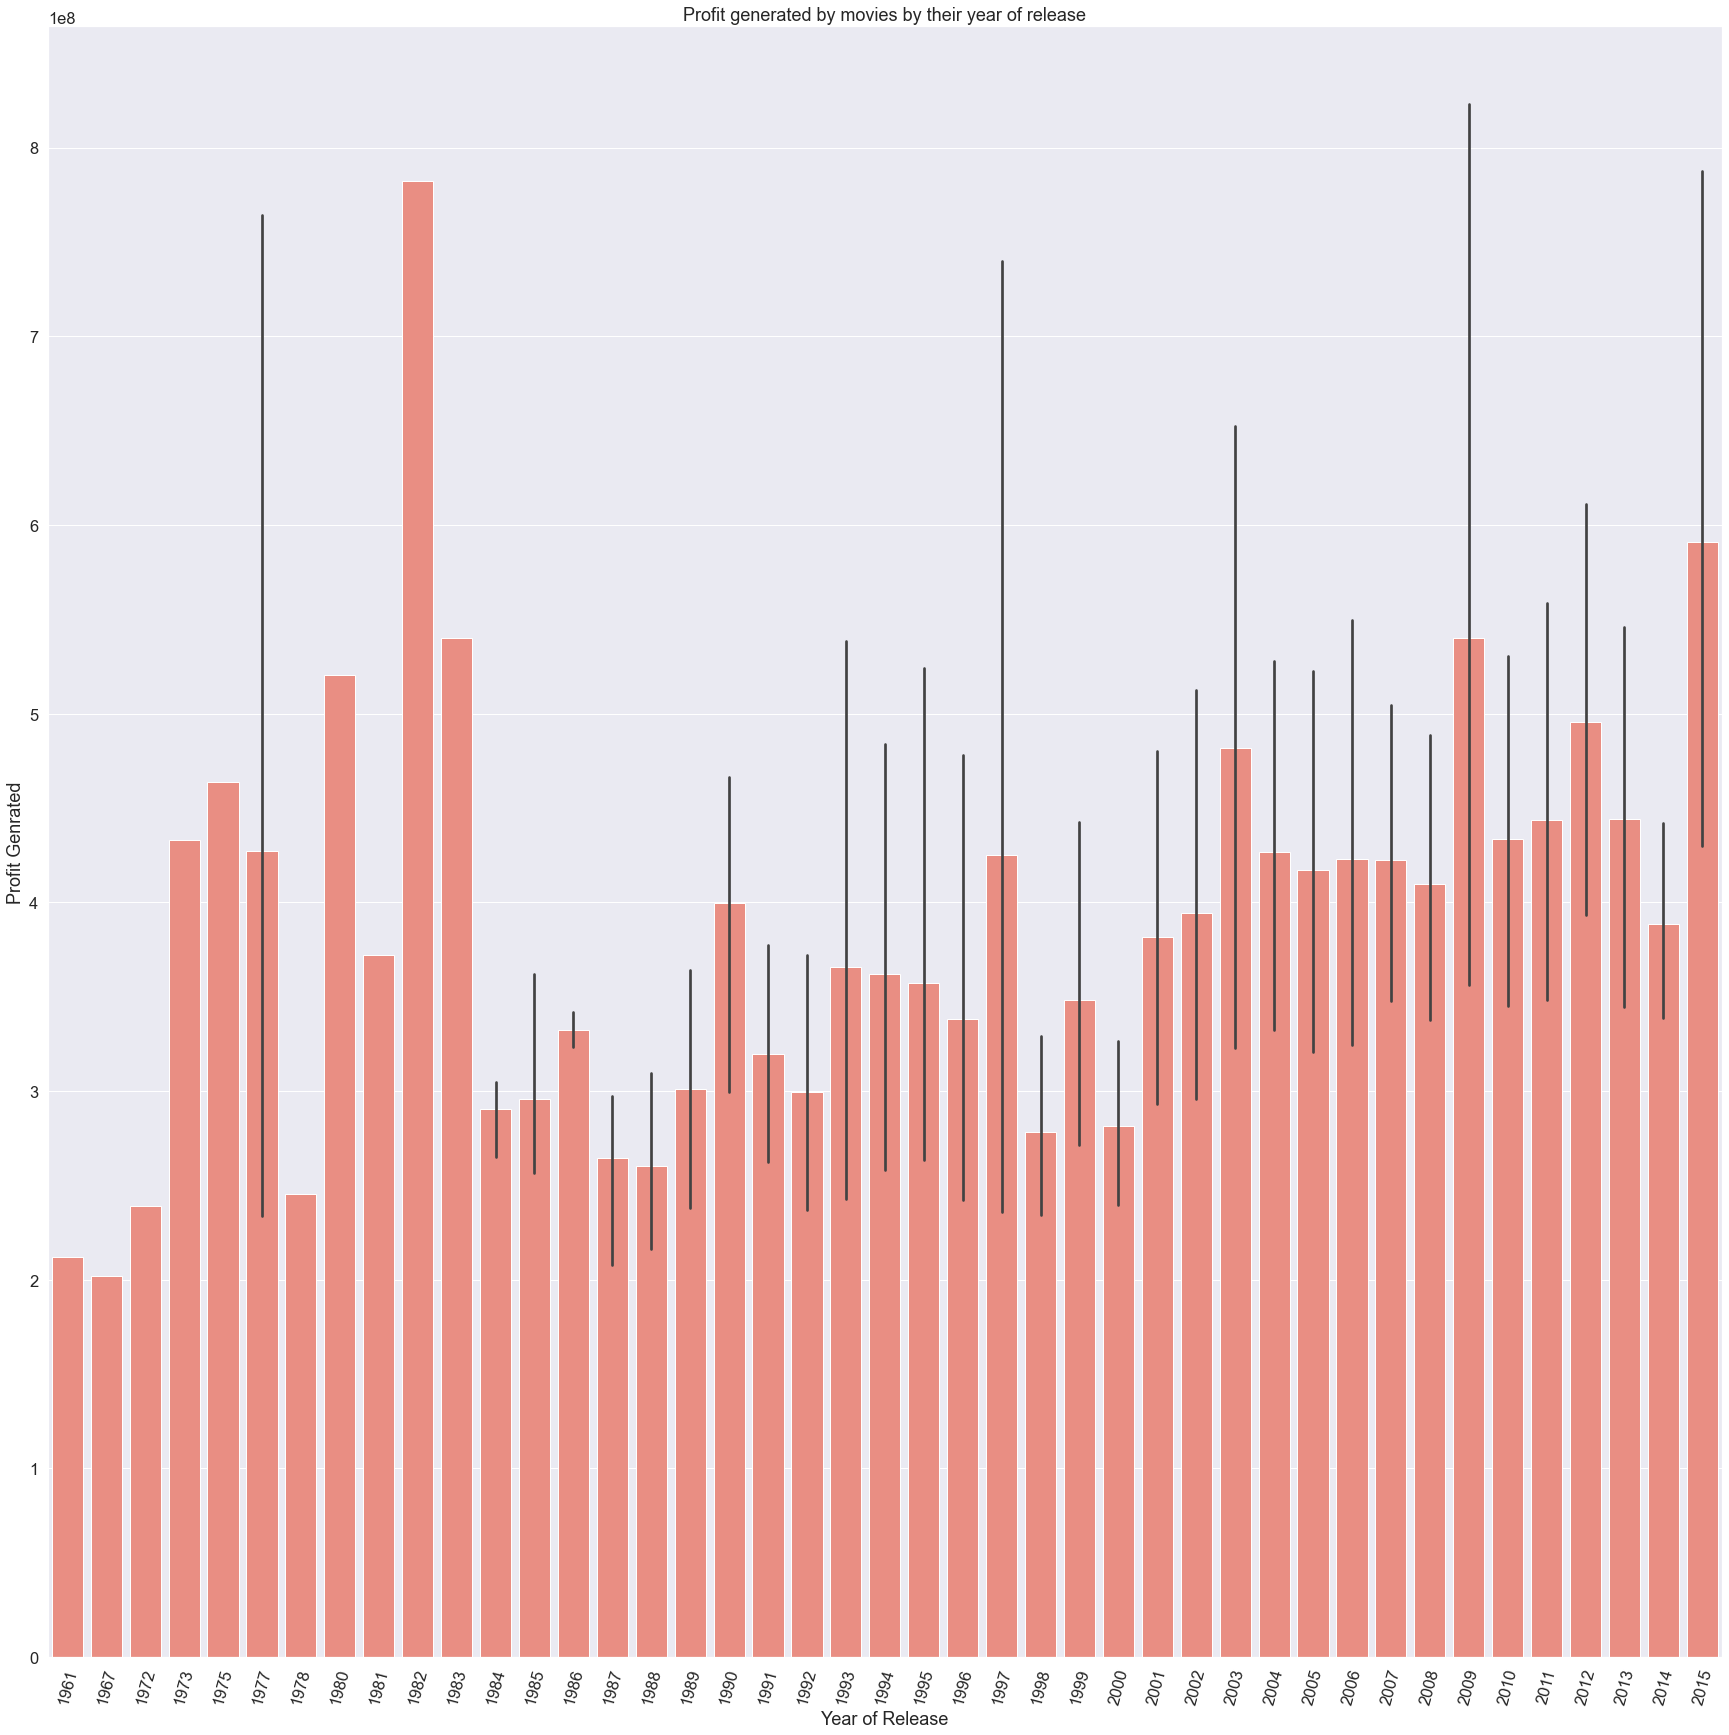

In [112]:
plot_bar_chart(tmdb_abv_200m, 'release_year', 'profit', xlabel="Year of Release", ylabel="Profit Genrated", title="Profit generated by movies by their year of release", rotation=75, show_value=True, color="salmon")

> **But for time series data analysis the line chart is the best visualization to use**

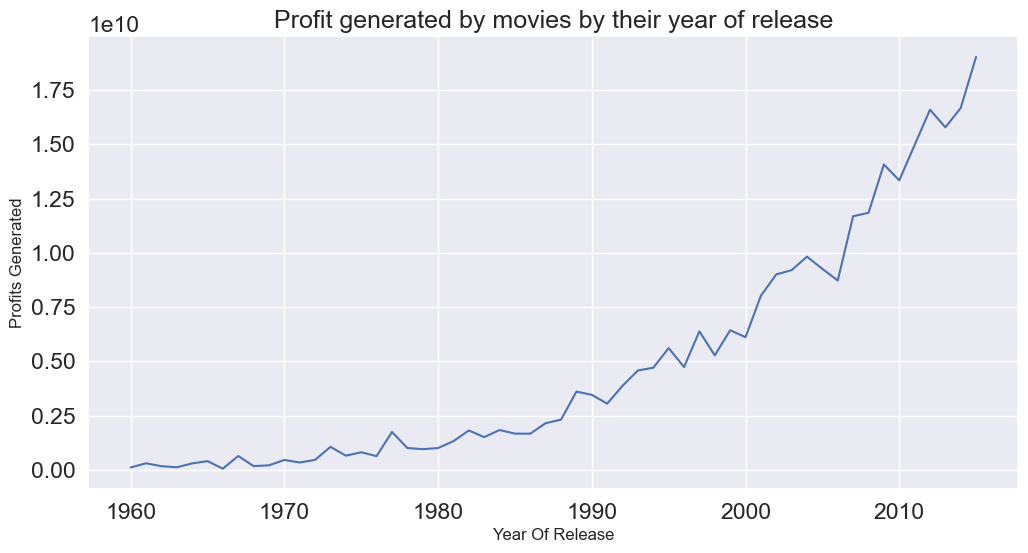

In [113]:
#summing up profits per year
profit_release_year = tmdb_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 100)

#on x-axis
plt.xlabel('Year Of Release', fontsize = 10)
#on y-axis
plt.ylabel('Profits Generated', fontsize = 10)
#title of the line plot
plt.title("Profit generated by movies by their year of release")

#plotting the graph
plt.plot(profit_release_year)

#displaying the line plot
plt.show()

In [119]:
#which year gave us the highest profit
max_year = profit_release_year.idxmax()
#which year gave us the least profit
min_year = profit_release_year.idxmin()

print(" {} is the year with minumum profit, while, {} is the year with maximum profit".format(min_year, max_year))

 1966 is the year with minumum profit, while, 2015 is the year with maximum profit


<a id='conclusions'></a>
## Conclusions

> *So to conclude, if we want to make a movie which can give us a profit of more then 200M Dollars then*  
**The average budget of the movies can be arround 95.3million Dollars.  
The average runtime of the movies can be around 119(a 2hrs long movie) Minutes.  
The Top 10 Genres(singular or mixedUp) we should focus on should be either Adventure, Action, Comedy, Drama, Thriller, Family, Fantasy,Science Fiction, Animation and Romance.  
The Top 5 cast we should looking to get on board should be Tom Cruise, Tom Hanks, Will Smith, Harrison Ford and Bruce Willis.  
The average revenue we should be expecting for the movie will be arround 509.3million Dollars**

> *These conclusions are not full proof and they have limitations*  
**We have a lot of movies which their budget and revenue records were not recorded so some datas are missing which were removed from the analysis. But these sample data tells us a story of the full picture.**


### Link i reffered to in using to solve my project

https://pandas.pydata.org/docs/index.html

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html